In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [7]:
iris_df=pd.read_csv('Iris.csv')

In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


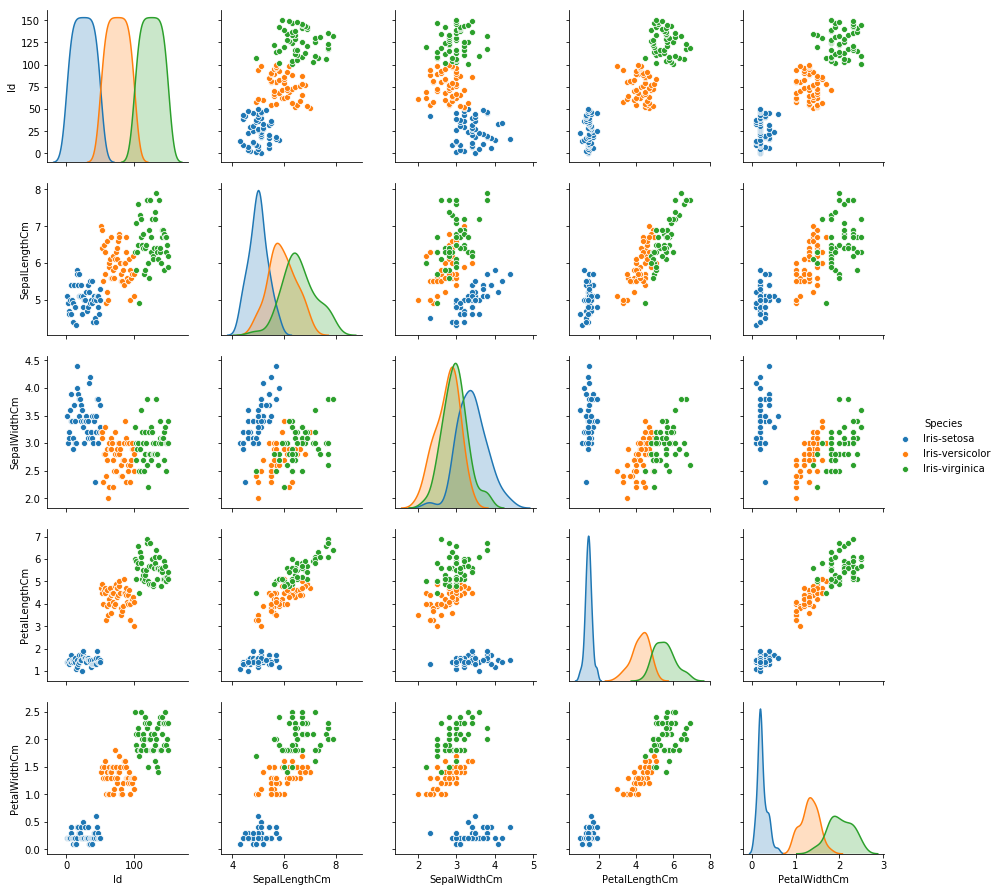

In [11]:
sns.pairplot(data=iris_df,hue='Species')

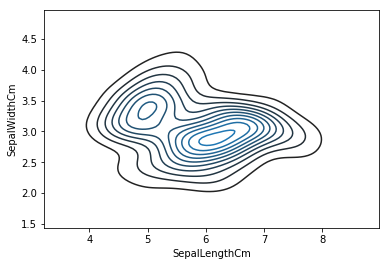

In [13]:
sns.kdeplot(data=iris_df['SepalLengthCm'],data2=iris_df['SepalWidthCm'])

In [15]:
X=iris_df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm' ]]
y=iris_df['Species']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
svc=SVC()

In [19]:
svc.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [20]:
predict=svc.predict(X_test)

In [21]:
print(confusion_matrix(y_test,predict))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [23]:
print(classification_report(y_test,predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

      micro avg       1.00      1.00      1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



In [24]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [27]:
grid_search=GridSearchCV( SVC(),param_grid,verbose=3)

In [28]:
grid_search.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.9142857142857143, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.8484848484848485, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ..................... C=0.1, gamma=1, score=0.9375, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...................... C=0.1, gamma=0.1, score=0.8, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8484848484848485, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................. C=0.1, gamma=0.1, score=0.90625, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ..... C=0.1

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [29]:
predict=grid_search.predict(X_test)

In [31]:
print(confusion_matrix(y_test,predict))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [32]:
print(classification_report(y_test,predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

      micro avg       1.00      1.00      1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50

